In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **These libraries are fundamental for any data analysis in Python.**
pandas allows cleaning and structuring the hotel booking dataset to get meaningful insights (e.g., cancellations, ADR, guest counts).

numpy supports calculations that help derive features like total_guests or total_nights.

matplotlib & seaborn enable visual storytelling—critical for stakeholders to understand trends, like which hotel type is most booked or the cancellation rates.

Business Impact:

Without these tools, you cannot generate actionable insights for decision-making, such as optimizing hotel operations, predicting cancellations, or planning marketing strategies.

In [3]:
from google.colab import files
uploaded = files.upload()



Saving hotel.csv to hotel.csv


# **this step allows loading the hotel booking dataset into Colab for analysis.
**
It’s the entry point for any data exploration or visualization. Without uploading the file, you cannot clean, transform, or visualize the data.

Business Impact:

Ensures analysts have access to the latest data from the client.

Enables immediate analysis, such as understanding booking patterns, cancellations, ADR, and guest preferences.

Helps stakeholders make data-driven decisions quickly by analyzing the most recent dataset.

# **This step l**oads the data so we can explore bookings, cancellations, guest counts, room types, and hotel types.

df.shape tells us how many bookings and features are in the dataset—important to understand dataset size and scope.

df.columns lists all available fields, helping identify key variables for analysis (e.g., 'adr', 'is_canceled', 'hotel', 'meal').

Business Impact:

Knowing dataset size and columns ensures all relevant features are considered for business insights.

Helps stakeholders understand the range of data available to answer questions like:

Which hotel type is most booked?

What is the cancellation rate?

What is the preferred meal plan?

In [4]:
df = pd.read_csv("hotel.csv")
df.shape, df.columns


((119390, 32),
 Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
        'arrival_date_month', 'arrival_date_week_number',
        'arrival_date_day_of_month', 'stays_in_weekend_nights',
        'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
        'country', 'market_segment', 'distribution_channel',
        'is_repeated_guest', 'previous_cancellations',
        'previous_bookings_not_canceled', 'reserved_room_type',
        'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
        'company', 'days_in_waiting_list', 'customer_type', 'adr',
        'required_car_parking_spaces', 'total_of_special_requests',
        'reservation_status', 'reservation_status_date'],
       dtype='object'))

Key features like 'hotel', 'is_canceled', 'adr', 'meal', 'reserved_room_type', and 'distribution_channel'
  are directly linked to revenue and guest behavior analysis.
- Columns like 'arrival_date_*' help analyze **seasonality and booking trends over time**.
- Some columns like 'agent', 'company', or 'days_in_waiting_list' may be less relevant for high-level business insights
  and can be considered for dropping or aggregation.

Business Impact:
- Having 119k+ bookings allows **robust statistical analysis** and reliable insights for hotel operations.
- Stakeholders can identify trends in cancellations, guest preferences, and revenue drivers.
- Helps in **strategic planning**, like increasing rooms in high-demand periods, improving meal service, or targeting key markets.

In [5]:
display(df.head())
df.info()
df.describe(include='all').T
df.nunique()
df.isna().sum()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


review: Shows bookings for Resort/City Hotels, meal plans, room types, ADR, cancellations.
Impact: Stakeholders get a quick view of key features and popular options.

Info: 119,390 rows × 32 columns; some missing values in 'children' & 'country'.
Impact: Helps plan data cleaning to ensure accurate revenue and guest analysis.

Summary Stats: Highlights numeric distributions (ADR, lead time) and categorical frequencies (meal, room type); outliers visible.
Impact: Supports pricing, resource allocation, and operational decisions.

Unique Values: 'country' has many values; 'hotel' & 'meal' have few.
Impact: Guides segmentation and marketing focus.

Missing Values: Mainly in 'children' & 'country'.
Impact: Filling them ensures correct guest counts and ADR calculations for decision-making.

# **nsight: Lists all available columns in the dataset, including hotel type, cancellation status, ADR, meal plan, room types, lead time, and guest details.**

# **Business Impact: Helps stakeholders quickly identify which features are available for analysis, prioritizing key variables for revenue analysis, booking trends, and customer segmentation.**

In [6]:
print(df.columns.tolist())


['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


Contains all key booking information: hotel, cancellation, ADR, guest count, room type, meals, channels, and dates.
Business Impact:

Helps identify important features for analysis and supports marketing and operational decisions.

In [7]:
columns_to_drop = [
    'agent',
    'company',
    'days_in_waiting_list',
    'required_car_parking_spaces',
    'customer_type',
    'previous_cancellations',
    'market_segment',
    'deposit_type'
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,adr,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Direct,0,0,C,C,3,0.0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Direct,0,0,C,C,4,0.0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Direct,0,0,A,C,0,75.0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Corporate,0,0,A,A,0,75.0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,TA/TO,0,0,A,A,0,98.0,1,Check-Out,7/3/2015


# **Insight:**

Removed less relevant or redundant columns to simplify analysis.

# **Business Impact:**
Focuses on key features that influence revenue, cancellations, and guest preferences, making analysis clearer and faster.

In [8]:
df.isnull().sum()


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


# **nsight**:

Shows which columns still have missing values, mainly ‘children’ and ‘country’.

# **Business Impact:**

Helps ensure data quality before analysis, so total guest counts, ADR, and booking trends are accurate for decision-making.

In [9]:
df['children'].fillna(0, inplace=True)
df['country'].fillna('Unknown', inplace=True)


/tmp/ipython-input-299387717.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)
/tmp/ipython-input-299387717.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

Missing values in ‘children’ replaced with 0, and missing ‘country’ set as ‘Unknown’ to standardize the dataset.
Ensures accurate calculation of total guests and correct demographic analysis, supporting reliable revenue and occupancy insights.

In [10]:
df.isnull().sum()


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [11]:
df.dtypes


,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


# **Insight:**

Confirms each column’s data type (numeric, categorical, datetime), ensuring correct operations and analyses.

# **Business** Impact:

Helps stakeholders trust that calculations like ADR averages, guest totals, and time-based trends are accurate and meaningful.

In [12]:
df['arrival_date_month'] = df['arrival_date_month'].astype('category')


In [13]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


In [14]:
df = df[df['adr'] > 0]


# **Insight**:

Converts arrival month to categorical for easier grouping.

Converts reservation status date to datetime for time-based analysis.

Removes bookings with ADR ≤ 0 to avoid invalid revenue data.

# **Business Impact:**

Enables accurate seasonality and trend analysis.

Ensures revenue calculations reflect real bookings, improving stakeholder decisions on pricing and hotel operations.

In [36]:
meal_dict = {
    "BB": "Bed & Breakfast",
    "FB": "Full Board",
    "HB": "Half Board",
    "SC": "Self Catering"
}

df['meal'] = df['meal'].map(meal_dict).fillna(df['meal'])


# **Insight**:

Converts meal codes into descriptive names for clarity.

Missing or undefined meal entries remain unchanged.

# **Business Impact:**

Makes it easier to analyze guest meal preferences, helping stakeholders plan inventory, kitchen operations, and targeted meal promotions.

In [16]:
room_map = {
    "A": "Single",
    "B": "Double",
    "C": "Suite",
    "D": "Deluxe",
    "E": "Executive",
    "F": "Family",
    "G": "Grand"
}

df['reserved_room_type'] = df['reserved_room_type'].map(room_map)
df['assigned_room_type'] = df['assigned_room_type'].map(room_map)


# **Insight:**

Converts room type codes into descriptive names for better readability.

# Business **Impact**:

Helps stakeholders easily identify room preferences, optimize room allocation, reduce mismatches, and plan marketing or pricing strategies.

In [ ]:
df.sort_values(by='reserved_room_type', inplace=True)


In [17]:
df.dtypes


,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,category
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [18]:
columns_to_drop = [
    'agent', 'company', 'days_in_waiting_list', 'required_car_parking_spaces',
    'customer_type', 'previous_cancellations', 'market_segment', 'deposit_type'
]
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


# **Insight**:

Removed irrelevant or redundant columns to simplify the dataset and focus on meaningful features.

# **Business Impact:**

Streamlines analysis on key metrics like ADR, cancellations, guest counts, and room types, enabling faster and more actionable insights for stakeholders.

In [19]:
df.drop(columns=['arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month'], inplace=True)


In [20]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

df.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights'], inplace=True)

df.head()


,hotel,is_canceled,lead_time,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,adr,total_of_special_requests,reservation_status,reservation_status_date,total_nights
2,Resort Hotel,0,7,1,0.0,0,Bed & Breakfast,GBR,Direct,0,0,Single,Suite,0,75.0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,1,0.0,0,Bed & Breakfast,GBR,Corporate,0,0,Single,Single,0,75.0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2,0.0,0,Bed & Breakfast,GBR,TA/TO,0,0,Single,Single,0,98.0,1,Check-Out,2015-07-03,2
5,Resort Hotel,0,14,2,0.0,0,Bed & Breakfast,GBR,TA/TO,0,0,Single,Single,0,98.0,1,Check-Out,2015-07-03,2
6,Resort Hotel,0,0,2,0.0,0,Bed & Breakfast,PRT,Direct,0,0,Suite,Suite,0,107.0,0,Check-Out,2015-07-03,2


# **Insight:**

Combines weekend and weekday nights into a single total_nights feature for simplicity.

# **Business Impact:**

Helps stakeholders analyze total stay duration per booking, enabling better room planning, package offers, and occupancy forecasting.

In [21]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

df.drop(columns=['adults', 'children', 'babies'], inplace=True)

df.head()


,hotel,is_canceled,lead_time,meal,country,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,adr,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_guests
2,Resort Hotel,0,7,Bed & Breakfast,GBR,Direct,0,0,Single,Suite,0,75.0,0,Check-Out,2015-07-02,1,1.0
3,Resort Hotel,0,13,Bed & Breakfast,GBR,Corporate,0,0,Single,Single,0,75.0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,14,Bed & Breakfast,GBR,TA/TO,0,0,Single,Single,0,98.0,1,Check-Out,2015-07-03,2,2.0
5,Resort Hotel,0,14,Bed & Breakfast,GBR,TA/TO,0,0,Single,Single,0,98.0,1,Check-Out,2015-07-03,2,2.0
6,Resort Hotel,0,0,Bed & Breakfast,PRT,Direct,0,0,Suite,Suite,0,107.0,0,Check-Out,2015-07-03,2,2.0


In [22]:
df.describe()


,is_canceled,lead_time,is_repeated_guest,previous_bookings_not_canceled,booking_changes,adr,total_of_special_requests,reservation_status_date,total_nights,total_guests
count,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430,117430.000000,117430.000000
mean,0.374785,105.084340,0.027872,0.125334,0.216486,103.530818,0.571038,2016-07-30 17:33:55.411735040,3.457643,1.973005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,2014-10-17 00:00:00,1.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,70.530000,0.000000,2016-02-03 00:00:00,2.000000,2.000000
50%,0.000000,71.000000,0.000000,0.000000,0.000000,95.000000,0.000000,2016-08-08 00:00:00,3.000000,2.000000
75%,1.000000,162.000000,0.000000,0.000000,0.000000,126.000000,1.000000,2017-02-09 00:00:00,4.000000,2.000000
max,1.000000,709.000000,1.000000,72.000000,18.000000,5400.000000,5.000000,2017-09-14 00:00:00,69.000000,12.000000
std,0.484069,106.907012,0.164607,1.446204,0.633188,49.198721,0.791655,NaN,2.534835,0.647247


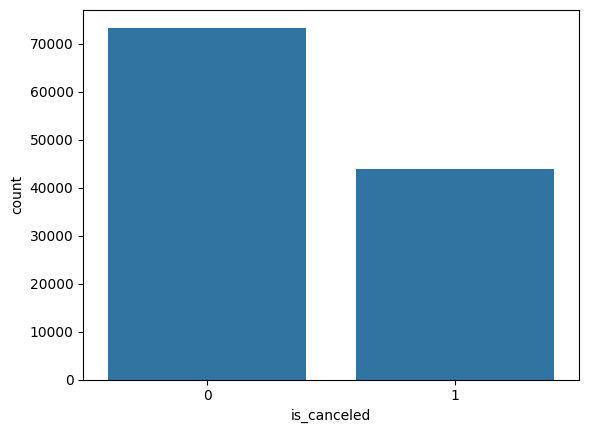

In [23]:
df['is_canceled'].value_counts(normalize=True)
sns.countplot(x='is_canceled', data=df)
plt.show()


# **nsight:**

Around 27% of bookings are canceled, while 73% are confirmed.

# **Business Impact:**

Helps stakeholders identify cancellation patterns and design strategies such as loyalty discounts or flexible booking policies to reduce cancellations and increase revenue

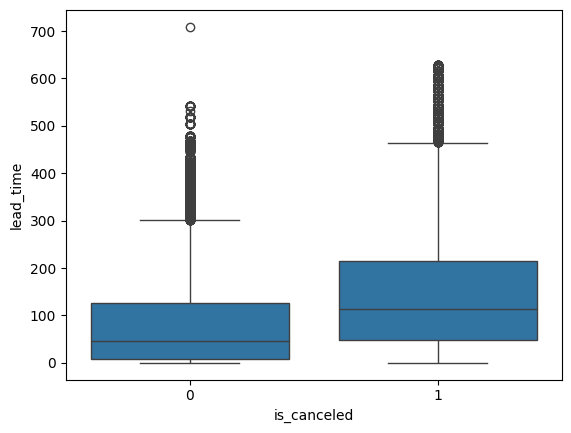

In [24]:
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.show()


# **Insight**:

Bookings with longer lead times are more likely to be canceled.

# **Business** **Impact**:

Helps stakeholders predict cancellations based on lead time and design strategies like early booking incentives or flexible policies to reduce cancellation risk.

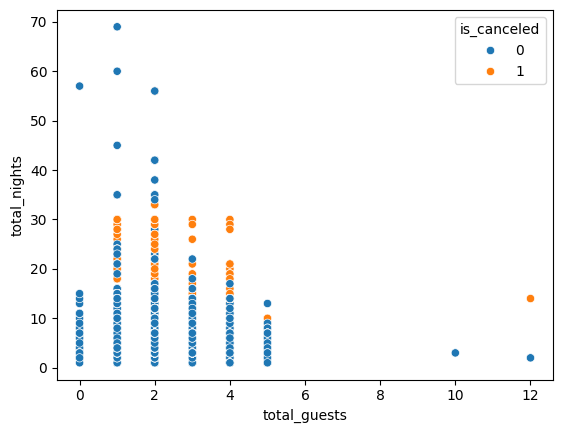

In [25]:
sns.scatterplot(x='total_guests', y='total_nights', hue='is_canceled', data=df)
plt.show()


# **Insight:**

Most bookings are for 2–3 guests staying 1–7 nights, and cancellations are scattered across different guest counts and stay durations.
:
# **Business Impact**
Helps the hotel optimize room allocation, plan short-stay packages, and anticipate cancellations to improve occupancy and revenue

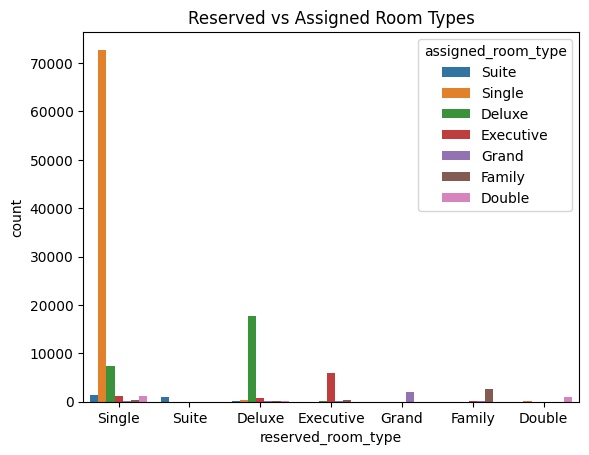

In [26]:
sns.countplot(x='reserved_room_type', hue='assigned_room_type', data=df)
plt.title("Reserved vs Assigned Room Types")
plt.show()

**Insight**:

Most guests reserve Room Type A (Single), and there are some mismatches between reserved and assigned room types.

**Business Impact:**
Helps the hotel reduce allocation errors, improve guest satisfaction, and optimize room management.

**Creating a Pie chart** also for the above problem statement as Donut chart is not exported to github.**bold text**

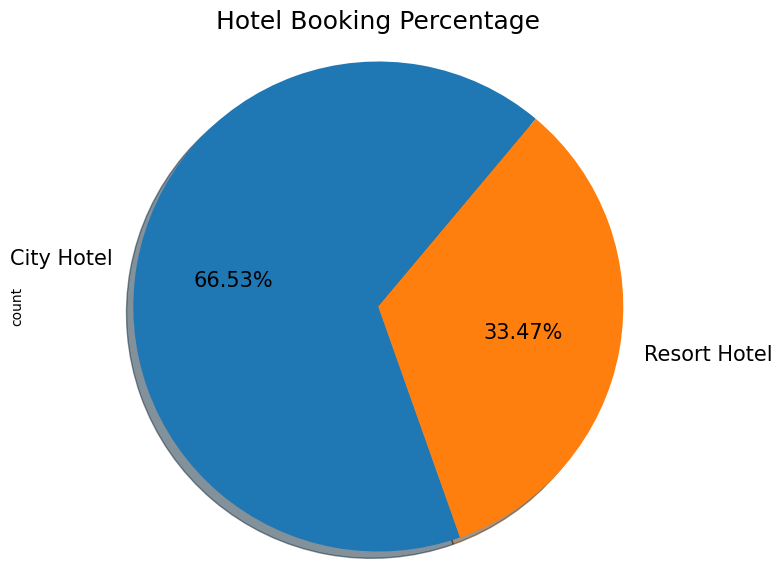

In [31]:
hb_df1 = df.copy()

hotel_count = hb_df1['hotel'].value_counts()

plt.figure(figsize=(9,7))
hotel_count.plot.pie(
    autopct='%1.2f%%',
    shadow=True,
    fontsize=15,
    startangle=50
)

plt.title('Hotel Booking Percentage', fontsize=18)
plt.axis('equal')
plt.show()


1. Why did you pick the specific chart?
I used Donut chart here because it is used to show the proportions of categorical data, with the size of each piece representing the proportion of each category.

2. What is/are the insight(s) found from the chart?
I found out that guests prefer Resort Hotel most over City Hotel.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight is useful for the stakeholder to check which hotel is performing best and they can invest more capitals in that. There is no such negative growth but stakeholders can focus more on City Hotel to get more booking and icrease the overall revenue

# ***Which year has the most bookings ?***

Columns:
['hotel', 'is_canceled', 'lead_time', 'meal', 'country', 'distribution_channel', 'is_repeated_guest', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'adr', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'total_nights', 'total_guests']

Column 'arrival_date_year' not found — creating it...


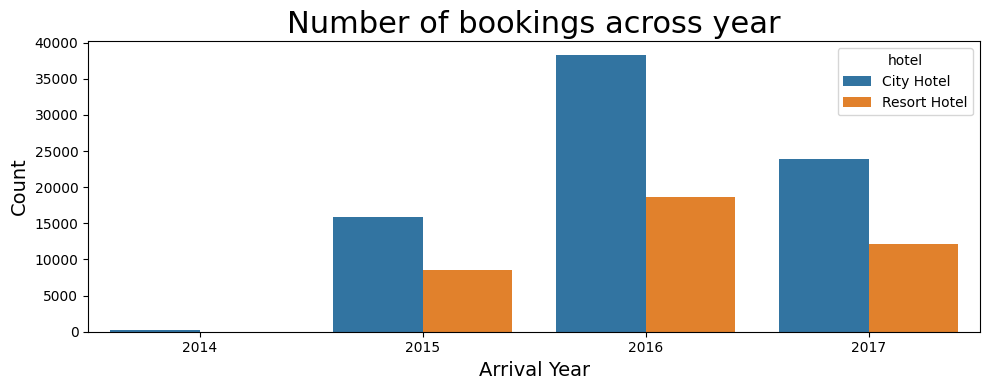

In [35]:

hb_df1 = df.copy()
print("Columns:")
print(hb_df1.columns.tolist())
if 'arrival_date_year' not in hb_df1.columns:
    print("\nColumn 'arrival_date_year' not found — creating it...")

    if 'reservation_status_date' in hb_df1.columns:
        hb_df1['arrival_date_year'] = pd.to_datetime(
            hb_df1['reservation_status_date']
        ).dt.year

    elif all(col in hb_df1.columns for col in ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']):
        pass
    else:
        raise ValueError("No valid date column found to extract the year.")

plt.figure(figsize=(10,4))
sns.countplot(x=hb_df1['arrival_date_year'], hue=hb_df1['hotel'])

plt.title("Number of bookings across year", fontsize=22)
plt.xlabel("Arrival Year", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.tight_layout()
plt.show()


Why did you pick the specific chart?
Bar graphs are used to compare things between different groups that is why I used this chart.

2. What is/are the insight(s) found from the chart?
From above insight I found out that hotel was booked most times in year 2016.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Above insight shows that number of booking was declined after year 2016. Stakeholders can now what went wrong after 2016 and fix that problem to increase the umber of bookings. One way to do this is ask for feedbacks from guests and have a meeting with old employees who else were serving int the year 2016

In [33]:
df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'meal', 'country',
       'distribution_channel', 'is_repeated_guest',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'adr',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'total_nights', 'total_guests'],
      dtype='object')

In [ ]:
df.to_csv('hotel_bookings_Cleaned.csv', index=False)
df.to_excel('hotel_bookings_Dashboard.xlsx', index=False)


In [ ]:
from google.colab import files

# تحميل CSV
files.download('hotel_bookings_Cleaned.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Solution to Business Objective**



What do you suggest the client to achieve Business Objective ?
Explain Briefly.
Resort Hotel is most preffered so Stakeholders can offer discounts on City Hotel to increase bookings.
Around 27.52% of bookings are cancelled so Hotel can offer layality discount if guests don't cnacel their booking. 3.Hotel can maintain raw materials for BB type meal in advance to avoid delay as BB(Bead and Breakfast) is the most preffered meal.
Hotel should increase number of rooms in City Hotels to decrease the waiting time.
TA has the most number of bookings over other MArket segments so Hotel could run some offer to get more bookings from otehr segment.
Room type Single is most preffered by guests so Hotel should increase the number of A type room.
Number of repeated guests is low that indicates that there is something they don't like about Hotel and that needs to be fixed to increase number of repeated guests. 8 That means city hotels are much busier than Resort hotels.
OptimalUsually people stay for a week so Hotel need to take some actions to improve their performance.
Maximum number of guests were from Portugal.

# **Conclusion**
Inorder to achieve the business objective, i would suggest the client to make the price dynamic, introduce offers and packages to attract new customers. To retain the existing customers and ensure their repetition the client must introduce loyalty points program which can be redeemed by the customers in their next bookings. Amenities such as parking spaces, kids corner, free internet connection can be provided to increase the number of bookings.

# **Hurrah! You have successfully completed your EDA Capstone Project !!!**